In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle (6).json to kaggle (6) (2).json


{'kaggle (6) (2).json': b'{"username":"akulaahemanthh09","key":"422d783072cf0199a610edc24bc7f031"}'}

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria?resource=download")

Skipping, found downloaded files in "./cell-images-for-detecting-malaria" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:

cell_types=os.listdir('/content/cell-images-for-detecting-malaria/cell_images/cell_images')
print(cell_types)

['Uninfected', 'Parasitized']


In [ ]:
cells=[]
for item in cell_types:
  all_cells=os.listdir('/content/cell-images-for-detecting-malaria/cell_images/cell_images'+'/'+item)
  for cell in all_cells:
    cells.append((item,str('/content/cell-images-for-detecting-malaria/cell_images/cell_images'+'/'+item)+'/'+cell))
cells

[('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C2NThinF_IMG_20150604_115238_cell_203.png'),
 ('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C79P40ThinF_IMG_20150817_102702_cell_175.png'),
 ('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C169P130ThinF_IMG_20151118_172913_cell_18.png'),
 ('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C104P65ThinF_IMG_20150918_172053_cell_160.png'),
 ('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C7NthinF_IMG_20150611_104824_cell_145.png'),
 ('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C82P43ThinF_IMG_20150817_123500_cell_148.png'),
 ('Uninfected',
  '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C223ThinF_IMG_20151112_104410_cell_15

In [ ]:
cells_df=pd.DataFrame(data=cells,columns=['cell_type','image'])
cells_df.head()

,cell_type,image
0,Uninfected,/content/cell-images-for-detecting-malaria/cel...
1,Uninfected,/content/cell-images-for-detecting-malaria/cel...
2,Uninfected,/content/cell-images-for-detecting-malaria/cel...
3,Uninfected,/content/cell-images-for-detecting-malaria/cel...
4,Uninfected,/content/cell-images-for-detecting-malaria/cel...


In [ ]:
print('Total number of cells in the dataset:',len(cells_df))
cells_count=cells_df['cell_type'].value_counts()
print(cells_count)

Total number of cells in the dataset: 27560
cell_type
Uninfected     13780
Parasitized    13780
Name: count, dtype: int64


<Axes: title={'center': 'Total Number of Classes'}, xlabel='count', ylabel='cell_type'>

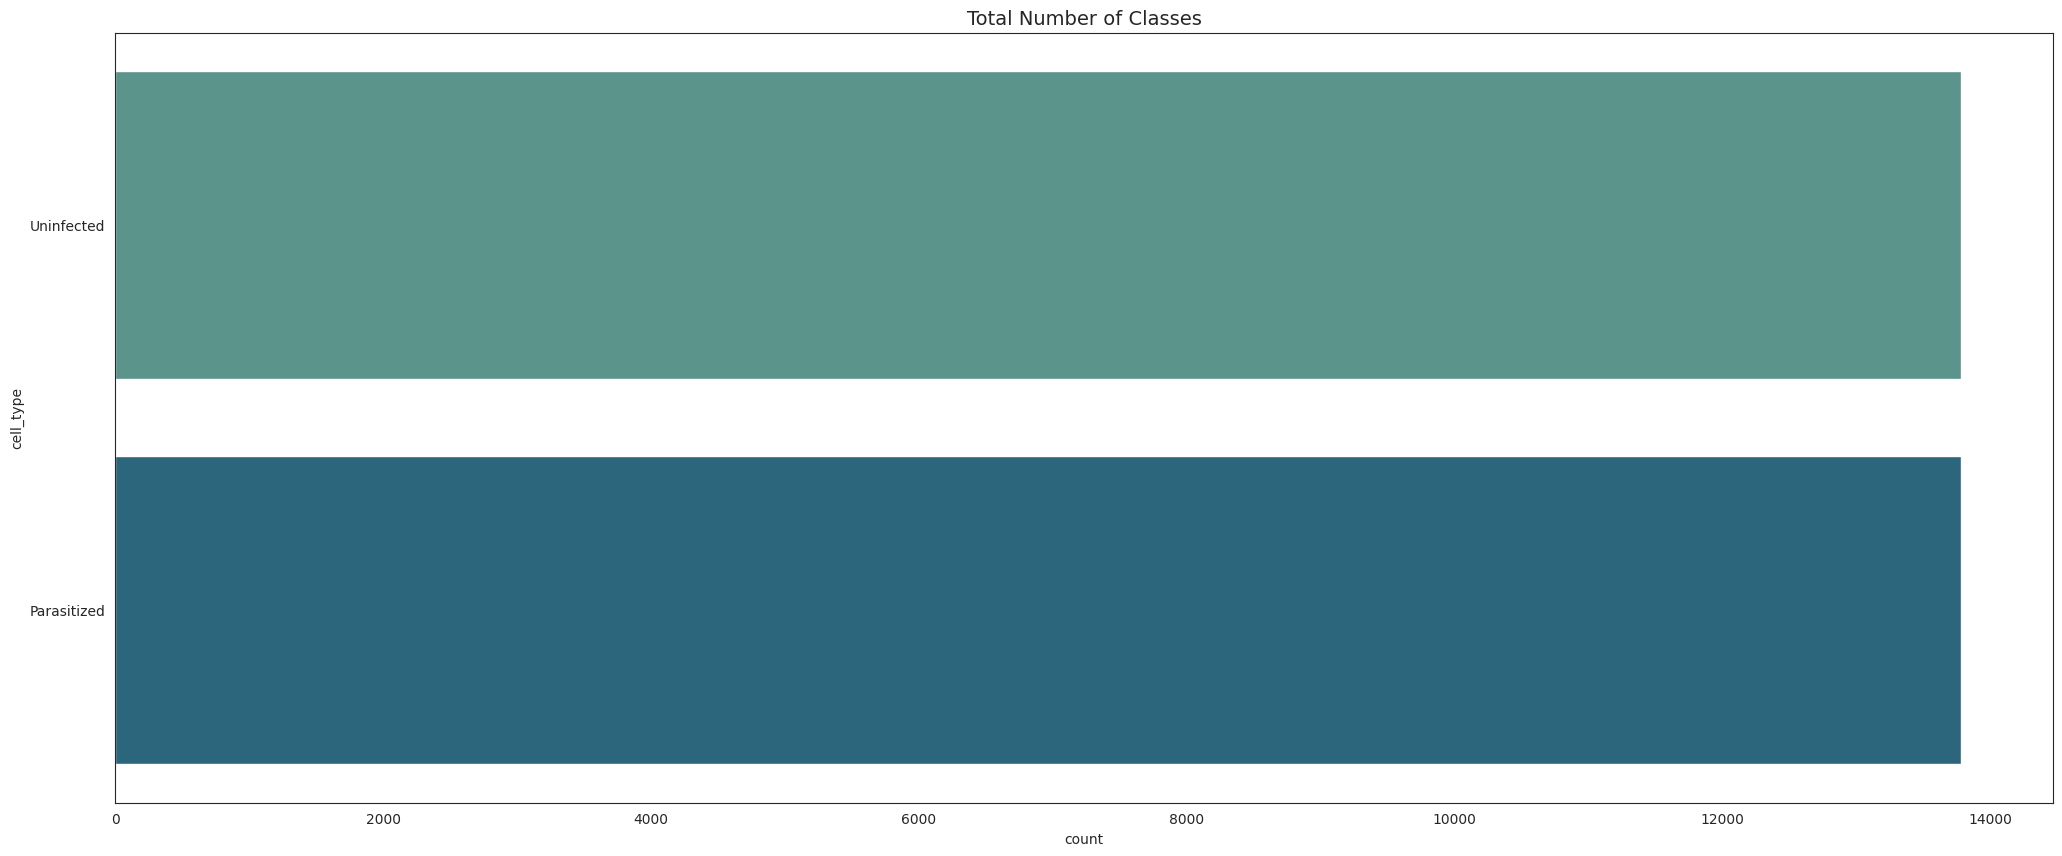

In [ ]:
fig=plt.figure(figsize=(25,10))
sns.set_style("white")
plt.title('Total Number of Classes',fontdict={'fontsize':14})
sns.countplot(cells_df['cell_type'],palette='crest')

In [ ]:
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cells_df, train_size = 0.89, shuffle = True, random_state=2)
print(train_df.shape, test_df.shape)

(24528, 2) (3032, 2)


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)


In [ ]:
img_rows, img_cols = 224, 224
batch_size = 32
classes = cells_df['cell_type'].nunique()
classes

2

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = "image",
    y_col = "cell_type",
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    subset = "training",
    shuffle = True,
    class_mode = "categorical"
)

Found 19621 validated image filenames belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = "image",
    y_col = "cell_type",
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    subset = "validation",
    shuffle = False,
    class_mode = "categorical"
)

Found 4905 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "image",
    y_col = "cell_type",
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    shuffle = False,
    class_mode = "categorical"
)

Found 3032 validated image filenames belonging to 2 classes.


In [ ]:
basemodel = tf.keras.applications.ResNet152V2(
    weights = "imagenet",
    input_shape = (img_rows, img_cols, 3),
    include_top = False
)
for layer in basemodel.layers:
    layer.trainable = False
x = basemodel.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
output = tf.keras.layers.Dense(classes, activation="softmax")(x)
model = tf.keras.Model(inputs = basemodel.inputs, outputs = output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [ ]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
earlystopper1 = EarlyStopping(monitor='loss', patience=10, verbose=1)
# Save the best model during the traning
checkpointer1 = ModelCheckpoint('best_model1.h1'
                                ,monitor='val_acc'
                                ,verbose=1
                                ,save_best_only=True
                                ,save_weights_only=True)

In [ ]:

t_model1 = model.fit(
    train_generator,
    epochs = 5,
    validation_data = val_generator,
    validation_steps = 1,
    callbacks=[earlystopper1, checkpointer1]
)

Epoch 1/5
614/614 [==============================] - ETA: 0s - loss: 0.2782 - accuracy: 0.8909

614/614 [==============================] - 327s 516ms/step - loss: 0.2782 - accuracy: 0.8909 - val_loss: 0.1670 - val_accuracy: 0.9062
Epoch 2/5
614/614 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9141

614/614 [==============================] - 312s 508ms/step - loss: 0.2226 - accuracy: 0.9141 - val_loss: 0.3405 - val_accuracy: 0.8125
Epoch 3/5
614/614 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9163

614/614 [==============================] - 315s 513ms/step - loss: 0.2184 - accuracy: 0.9163 - val_loss: 0.2590 - val_accuracy: 0.9062
Epoch 4/5
614/614 [==============================] - ETA: 0s - loss: 0.2113 - accuracy: 0.9208

614/614 [==============================] - 313s 509ms/step - loss: 0.2113 - accuracy: 0.9208 - val_loss: 0.2079 - val_accuracy: 0.9062
Epoch 5/5
614/614 [==============================] - ETA: 0s - loss: 0.2096 - accuracy: 0.9183

614/614 [==============================] - 316s 513ms/step - loss: 0.2096 - accuracy: 0.9183 - val_loss: 0.2621 - val_accuracy: 0.9062


In [ ]:
tf.keras.models.save_model(model,'mymodel.h5')

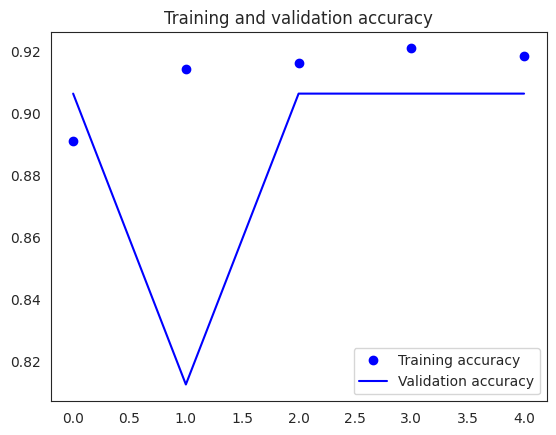

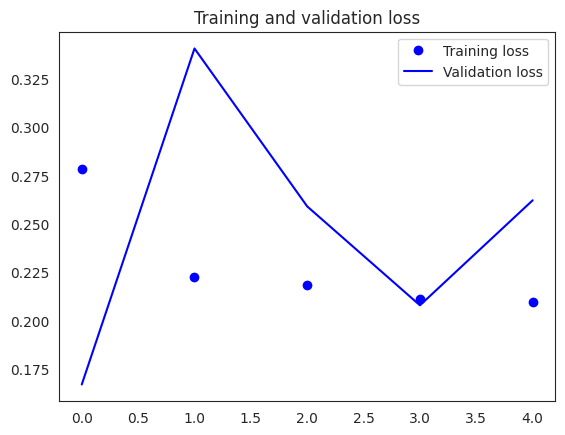

In [ ]:
accuracy = t_model1.history['accuracy']
val_accuracy = t_model1.history['val_accuracy']
loss = t_model1.history['loss']
val_loss = t_model1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(val_generator, verbose = 1)
print("Loss: {:.3f}".format(scores[0]))
print("Accuracy: {:.3f}".format(scores[1]))

154/154 [==============================] - 79s 515ms/step - loss: 0.2050 - accuracy: 0.9238
Loss: 0.205
Accuracy: 0.924


In [ ]:
test_pred = model.predict(test_generator, verbose=1)
test_labels = np.argmax(test_pred, axis=1)
test_labels[:10]

95/95 [==============================] - 24s 231ms/step


array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}
classes = list(class_labels.values())
classes

['Parasitized', 'Uninfected']

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")

print(classification_report(test_generator.classes, test_labels,target_names = classes))

Classification Report
              precision    recall  f1-score   support

 Parasitized       0.97      0.92      0.94      1460
  Uninfected       0.93      0.97      0.95      1572

    accuracy                           0.95      3032
   macro avg       0.95      0.95      0.95      3032
weighted avg       0.95      0.95      0.95      3032



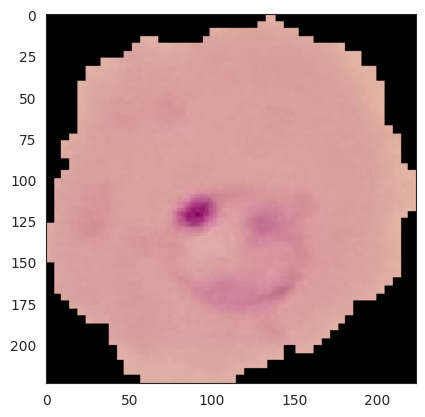

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',
                                         target_size = (224, 224))
plt.imshow(img)

In [ ]:
img =tf.keras.preprocessing.image.img_to_array(img)
x = img/255
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [ ]:
CLASS_NAMES = {
    'classes' :['parasitized','uninfected']
    }
prediction = model.predict(x)
predicted_c = np.argmax(prediction, axis=1)
predicted_c
predicted_class = CLASS_NAMES['classes'][predicted_c[0]]
print("This image is of :",predicted_class.lower())

1/1 [==============================] - 2s 2s/step
This image is of : parasitized


In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import random
from PIL import Image, ImageOps
import numpy as np

# hide deprication warnings which directly don't affect the working of the application
import warnings
warnings.filterwarnings("ignore")

# set some pre-defined configurations for the page, such as the page title, logo-icon, page loading state (whether the page is loaded automatically or you need to perform some action for loading)
st.set_page_config(
    page_title=" Disease Detection",
    page_icon = ":malaria:",
    initial_sidebar_state = 'auto'
)

# hide the part of the code, as this is just for adding some custom CSS styling but not a part of the main idea
hide_streamlit_style = """
	<style>
  #MainMenu {visibility: hidden;}
	footer {visibility: hidden;}
  </style>
"""
st.markdown(hide_streamlit_style, unsafe_allow_html=True) # hide the CSS code from the screen as they are embedded in markdown text. Also, allow streamlit to unsafely process as HTML

def prediction_cls(prediction): # predict the class of the images based on the model results
    for key, clss in class_names.items(): # create a dictionary of the output classes
        if np.argmax(prediction)==clss: # check the class

            return key

with st.sidebar:
        #st.image('mg.png')
        st.title("Image classification")
        st.subheader("Accurate detection of diseases")

st.write("""
         # Disease Detection
         """
         )

file = st.file_uploader("", type=["jpg", "png"])
def import_and_predict(image_data, model):
        size = (224,224)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = np.asarray(image)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        return prediction


if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    x = random.randint(98,99)+ random.randint(0,99)*0.01
    st.sidebar.error("Accuracy : " + str(x) + " %")

    class_names = ['Parasitized', 'Uninfected']

    string = "Detected Disease : " + class_names[np.argmax(predictions)]
    if class_names[np.argmax(predictions)] == 'Parasitized':
        st.balloons()
        st.sidebar.success(string)

    else:

      st.sidebar.warning(string)
      st.markdown("## Remedy")
      st.info("The image is uninfected")

import streamlit as st
import tensorflow as tf
import random
from PIL import Image, ImageOps
import numpy as np

# ... (rest of your code)

# Removed @st.cache decorator
def load_model():
    model=tf.keras.models.load_model('/content/mymodel.h5')
    return model

with st.spinner('Model is being loaded..'):
    model=load_model()




Overwriting app.py


In [ ]:
! pip install pyngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
!ngrok authtoken 2i9FUWahjywUUNZSMlYy0cu2qDJ_4YEvqhD9R1aoD7542GoFX

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

# Use 'addr' instead of 'port' to specify the address and port
url = ngrok.connect(addr="8501")
print(url)

NgrokTunnel: "https://cfab-34-124-137-210.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!cat /content/nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.137.210:8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.124.137.210:8502

2024-06-20 14:54:08.347439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 14:54:08.347567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 14:54:08.349160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 